data science end of year project part 2
Fasion mnist-2 3.8.21

In [1]:
# all imports that i wuill need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from sklearn.model_selection import cross_val_score # didnt use
from sklearn.model_selection import cross_val_predict  # didnt use
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score  
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
# importing the data set
training_set=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_train.csv")
testing_set_dont_touch=pd.read_csv(r"C:\Users\nechd\Documents\Yehudit docs\אוניברסיטת אריאל\שנה א סמסטר ב\הדמיית נתונים\מטלת גמר\fasion mnist\fashion-mnist_test.csv")

In [3]:
training_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# spliting the training set so that i can train and test the models
train_set, test_set = train_test_split(training_set, test_size=0.2, random_state=42)

In [5]:
# changing the the data into a numpy array wuth the data type  being float 32, so tha i cab see the pictures

train_set=np.array(train_set,dtype='float32')
test_set=np.array(test_set,dtype='float32')

# dividing the data intu x,y groups.
# x is all the features
# y is the classification

x_train_set=train_set[:, 1:]
y_train_set=train_set[:, 0]
x_test_set=test_set[:, 1:]
y_test_set=test_set[:, 0]


testing_set_dont_touch=np.array(testing_set_dont_touch,dtype='float32')

x_testing_set_dont_touch=testing_set_dont_touch[:, 1:]
y_testing_set_dont_touch=testing_set_dont_touch[:, 0]

In [6]:
x_train_set

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

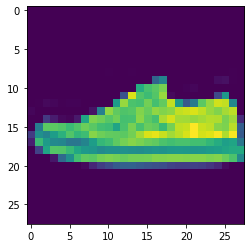

In [7]:
image1=x_train_set[1, :].reshape((28,28))
plt.imshow(image1)

In [8]:
# pca lowers the amount of featues,
# here we are making are data set containe the features that represnt 90% of the varience.

In [9]:
pca=PCA(n_components=0.9)
x_train_reduced=pca.fit_transform(x_train_set)
x_train_recovered=pca.inverse_transform(x_train_reduced)

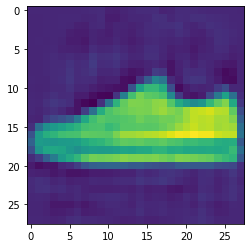

In [10]:
image1=x_train_recovered[1, :].reshape((28,28))
plt.imshow(image1)

In [11]:
# function to represent the confussion matrix nicely
def confussion_matrix(cf_matrix):
    plt.figure(figsize=(10,10))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [12]:
# here we are making are data set containe the features that represnt 90% of the varience.
pca1=PCA(n_components=0.9)
x_train_reduced1=pca1.fit_transform(x_train_set)
x_train_recovered1=pca1.inverse_transform(x_train_reduced1)
x_test_reduced1=pca1.transform(x_test_set)
x_test_recovered1=pca1.inverse_transform(x_test_reduced1)

In [13]:
# this data set has 84 features
pca1.n_components_

84

In [14]:
knn1 = KNeighborsClassifier(n_neighbors=27)
knn1.fit(x_train_reduced1, y_train_set)
y_pred_knn1=knn1.predict(x_test_reduced1)
accuracy_knn1=metrics.accuracy_score(y_test_set, y_pred_knn1)
accuracy_knn1

0.85025

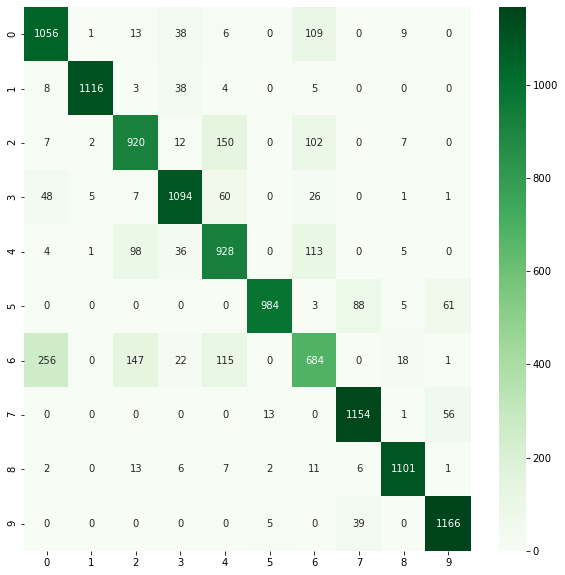

In [15]:
mat_knn1=confusion_matrix(y_test_set, y_pred_knn1)
confussion_matrix(mat_knn1)


In [16]:
print("precision_score_knn:",precision_score(y_test_set, y_pred_knn1, average='weighted')) 
print("recall_score_knn:",recall_score(y_test_set, y_pred_knn1,average='weighted'))
print("f1_score_knn:",f1_score(y_test_set, y_pred_knn1,average='weighted'))

precision_score_knn: 0.8504580520435633
recall_score_knn: 0.85025
f1_score_knn: 0.8490208813908782


In [17]:
#cross validation
cv_scores_knn1=cross_val_score(knn1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn1, "mean:", np.mean(cv_scores_knn1))

[0.85083333 0.853125   0.8484375  0.845625   0.84364583] mean: 0.8483333333333334


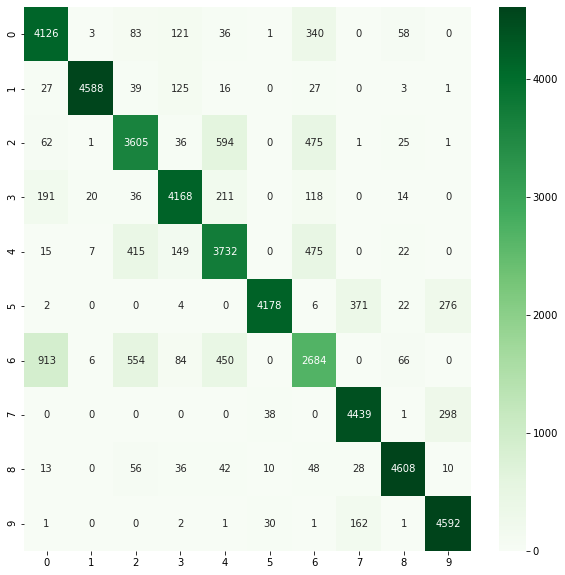

In [18]:
y_pred_knn1_c = cross_val_predict(knn1,  x_train_reduced1, y_train_set, cv=5)
cofussion_knn1=confusion_matrix(y_train_set, y_pred_knn1_c)
confussion_matrix(cofussion_knn1)

In [19]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8492533799725965
recall_score: 0.8483333333333334
f1_score: 0.847574247035811


In [20]:
XG1=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG1.fit(x_train_reduced1, y_train_set)
y_pred_XG1=XG1.predict(x_test_reduced1)
accuracy_XG1=metrics.accuracy_score(y_test_set, y_pred_XG1)
accuracy_XG1

0.857

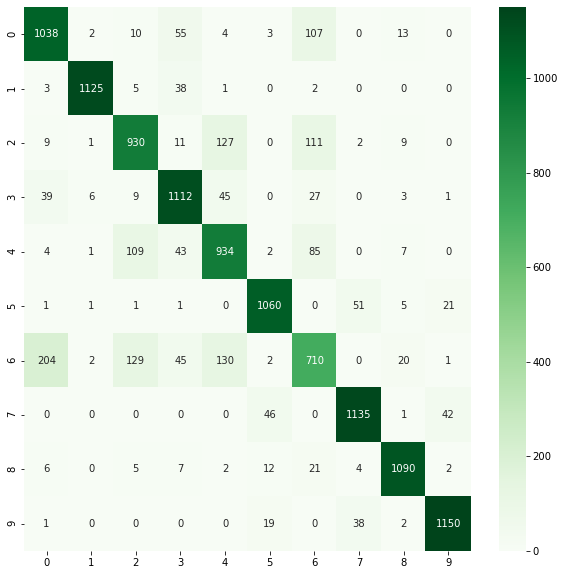

In [21]:
mat_XG1=confusion_matrix(y_test_set, y_pred_XG1)
confussion_matrix(mat_XG1)

In [22]:
print("precision_score_XG1:",precision_score(y_test_set, y_pred_XG1, average='weighted')) 
print("recall_score_XG1:",recall_score(y_test_set, y_pred_XG1,average='weighted'))
print("f1_score_XG1:",f1_score(y_test_set, y_pred_XG1,average='weighted'))

precision_score_XG1: 0.8553760887246975
recall_score_XG1: 0.857
f1_score_XG1: 0.85559160519721


In [23]:
#cross validation
cv_scores_XG1=cross_val_score(XG1, x_train_reduced1, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG1, "mean:", np.mean(cv_scores_XG1))

[0.86104167 0.85958333 0.85677083 0.85       0.86010417] mean: 0.8575000000000002


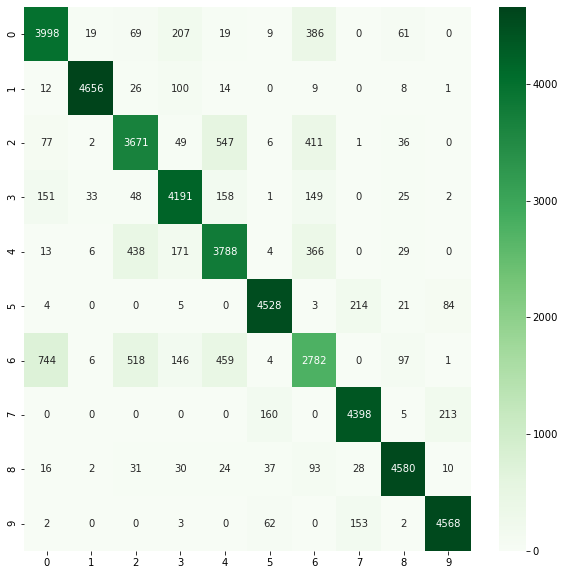

In [24]:
y_pred_xg1_c = cross_val_predict(XG1,  x_train_reduced1, y_train_set, cv=5)
cofussion_xg1=confusion_matrix(y_train_set, y_pred_xg1_c)
confussion_matrix(cofussion_xg1)

In [25]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg1_c,average='weighted'))

precision_score: 0.8561314432045871
recall_score: 0.8575
f1_score: 0.8564518874954093


In [26]:
vote1=VotingClassifier(estimators=[('knn1',knn1),('XG1',XG1)], voting='soft', weights=[0.45,0.55])
vote1.fit(x_train_reduced1, y_train_set)
for clf in(knn1, XG1, vote1):
    clf.fit(x_train_reduced1, y_train_set) 
    y_pred_vote1=clf.predict(x_test_reduced1)
    print(clf.__class__ ,accuracy_score(y_test_set,y_pred_vote1))
a_vote1=metrics.accuracy_score(y_test_set, y_pred_vote1)
a_vote1

<class 'sklearn.neighbors._classification.KNeighborsClassifier'> 0.85025
<class 'xgboost.sklearn.XGBClassifier'> 0.857
<class 'sklearn.ensemble._voting.VotingClassifier'> 0.8635833333333334


0.8635833333333334

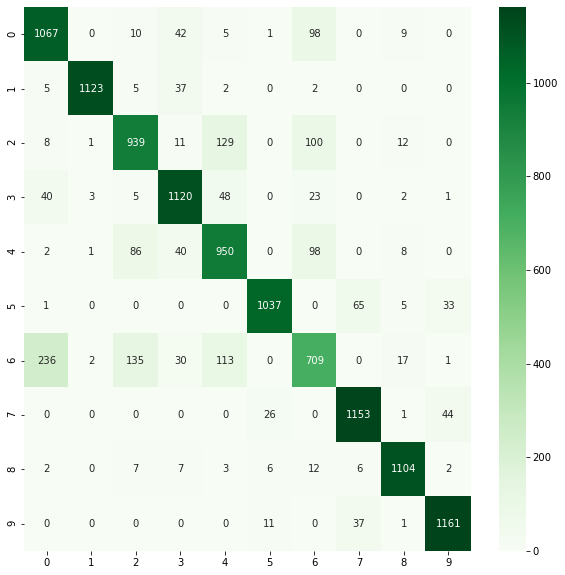

In [27]:
mat_vote1=confusion_matrix(y_test_set, y_pred_vote1)
confussion_matrix(mat_vote1)

In [28]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_test_set, y_pred_vote1,average='weighted')) 
print("recall_score:",recall_score(y_test_set, y_pred_vote1,average='weighted'))
print("f1_score:",f1_score(y_test_set, y_pred_vote1,average='weighted'))

precision_score: 0.8623641572884693
recall_score: 0.8635833333333334
f1_score: 0.862037994215409


In [29]:
# here we are making are data set contane the features that represnt 80% of the varience.

In [30]:
pca2=PCA(n_components=0.8)
x_train_reduced2=pca2.fit_transform(x_train_set)
x_train_recovered2=pca2.inverse_transform(x_train_reduced2)
x_test_reduced2=pca2.transform(x_test_set)
x_test_recovered2=pca2.inverse_transform(x_test_reduced2)

In [31]:
# this data set has 24 features
pca2.n_components_

24

In [32]:
knn2 = KNeighborsClassifier(n_neighbors=27)
knn2.fit(x_train_recovered2, y_train_set)
y_pred_knn2=knn2.predict(x_test_recovered2)
accuracy_knn2=metrics.accuracy_score(y_test_set, y_pred_knn2)
accuracy_knn2

0.8411666666666666

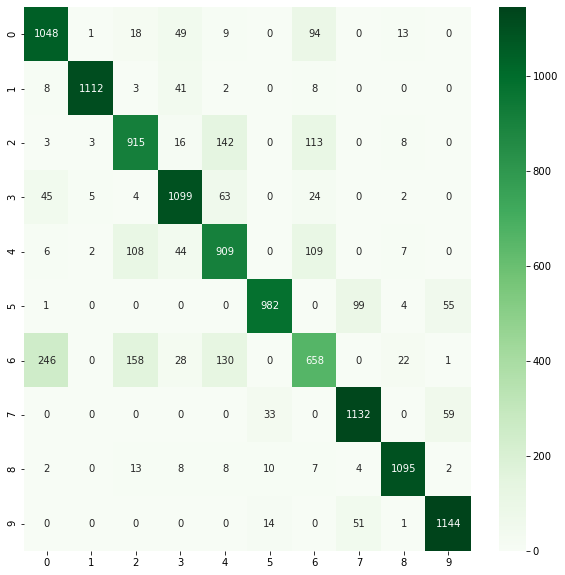

In [33]:
mat_knn2=confusion_matrix(y_test_set, y_pred_knn2)
confussion_matrix(mat_knn2)

In [34]:
print("precision_score_knn2:",precision_score(y_test_set, y_pred_knn2, average='weighted')) 
print("recall_score_knn2:",recall_score(y_test_set, y_pred_knn2,average='weighted'))
print("f1_score_knn2:",f1_score(y_test_set, y_pred_knn2,average='weighted'))

precision_score_knn2: 0.8401246188415095
recall_score_knn2: 0.8411666666666666
f1_score_knn2: 0.8393749439193116


In [35]:
#cross validation
cv_scores_knn2=cross_val_score(knn2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn2, "mean:", np.mean(cv_scores_knn2))

[0.84333333 0.843125   0.83875    0.83541667 0.84041667] mean: 0.8402083333333333


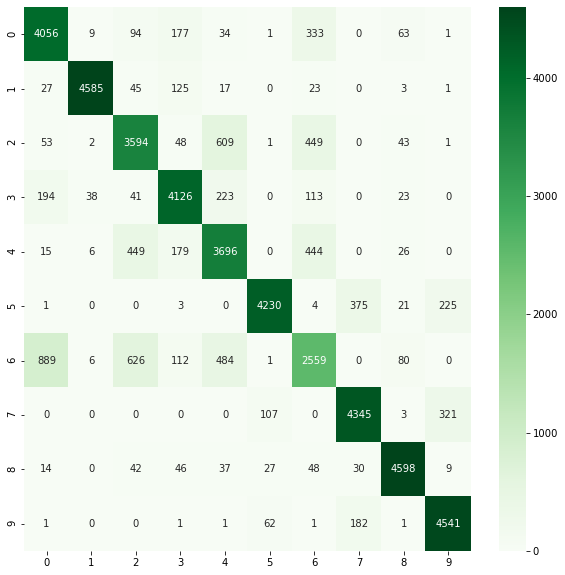

In [36]:
y_pred_knn2_c = cross_val_predict(knn2,  x_train_reduced2, y_train_set, cv=5)
cofussion_knn2=confusion_matrix(y_train_set, y_pred_knn2_c)
confussion_matrix(cofussion_knn2)

In [37]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn1_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn1_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn1_c,average='weighted'))

precision_score: 0.8492533799725965
recall_score: 0.8483333333333334
f1_score: 0.847574247035811


In [38]:
XG2=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG2.fit(x_train_reduced2, y_train_set)
y_pred_XG2=XG2.predict(x_test_reduced2)
accuracy_XG2=metrics.accuracy_score(y_test_set, y_pred_XG2)
accuracy_XG2

0.8393333333333334

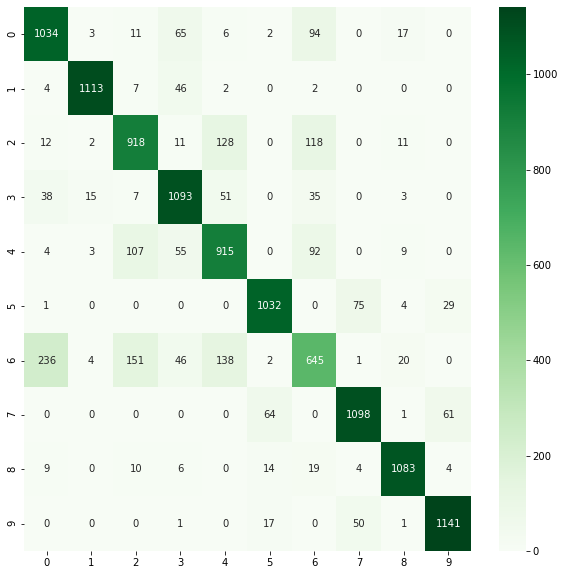

In [39]:
mat_XG2=confusion_matrix(y_test_set, y_pred_XG2)
confussion_matrix(mat_XG2)

In [40]:
print("precision_score_XG2:",precision_score(y_test_set, y_pred_XG2, average='weighted')) 
print("recall_score_XG2:",recall_score(y_test_set, y_pred_XG2,average='weighted'))
print("f1_score_XG2:",f1_score(y_test_set, y_pred_XG2,average='weighted'))

precision_score_XG2: 0.8368861716499038
recall_score_XG2: 0.8393333333333334
f1_score_XG2: 0.8371350934792667


In [41]:
#cross validation
cv_scores_XG2=cross_val_score(XG2, x_train_reduced2, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG2, "mean:", np.mean(cv_scores_XG2))

[0.84614583 0.8428125  0.84833333 0.839375   0.83875   ] mean: 0.8430833333333332


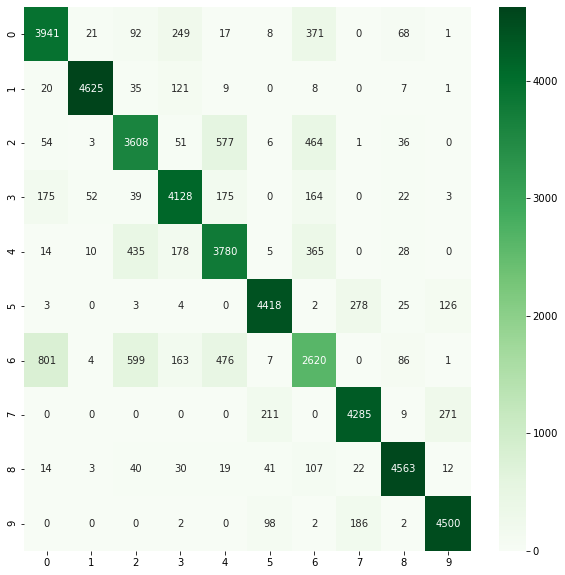

In [42]:
y_pred_xg2_c = cross_val_predict(XG2,  x_train_reduced2, y_train_set, cv=5)
cofussion_xg2=confusion_matrix(y_train_set, y_pred_xg2_c)
confussion_matrix(cofussion_xg2)

In [43]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg2_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg2_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg2_c,average='weighted'))

precision_score: 0.8414408494081917
recall_score: 0.8430833333333333
f1_score: 0.8417827785822511


In [44]:
# here we are making are data set containe the features that represnt 70% of the varience.
pca3=PCA(n_components=0.7)
x_train_reduced3=pca3.fit_transform(x_train_set)
x_train_recovered3=pca3.inverse_transform(x_train_reduced3)
x_test_reduced3=pca3.transform(x_test_set)
x_test_recovered3=pca3.inverse_transform(x_test_reduced3)

In [45]:
# this data set has 9 features
pca3.n_components_

9

In [46]:
knn3 = KNeighborsClassifier(n_neighbors=27)
knn3.fit(x_train_reduced3, y_train_set)
y_pred_knn3=knn3.predict(x_test_reduced3)
accuracy_knn3=metrics.accuracy_score(y_test_set, y_pred_knn3)
accuracy_knn3

0.805

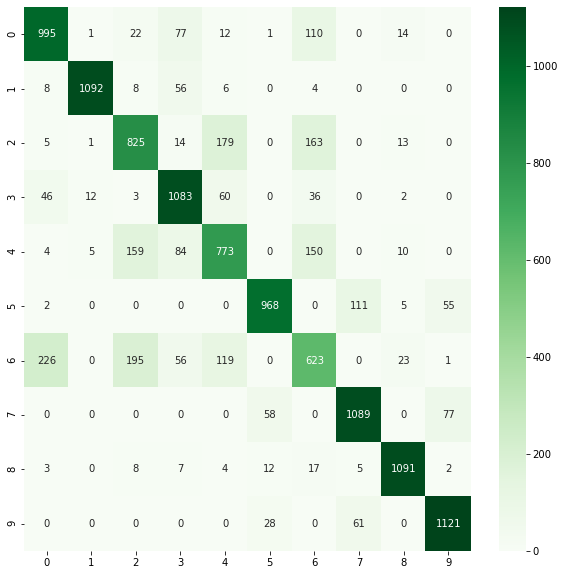

In [47]:
mat_knn3=confusion_matrix(y_test_set, y_pred_knn3)
confussion_matrix(mat_knn3)

In [48]:
print("precision_score_knn3:",precision_score(y_test_set, y_pred_knn3, average='weighted')) 
print("recall_score_knn3:",recall_score(y_test_set, y_pred_knn3,average='weighted'))
print("f1_score_knn3:",f1_score(y_test_set, y_pred_knn3,average='weighted'))

precision_score_knn3: 0.8033518506138512
recall_score_knn3: 0.805
f1_score_knn3: 0.803469354900917


In [49]:
#cross validation
cv_scores_knn3=cross_val_score(knn3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_knn3, "mean:", np.mean(cv_scores_knn3))

[0.80604167 0.8015625  0.8040625  0.8034375  0.80145833] mean: 0.8033125


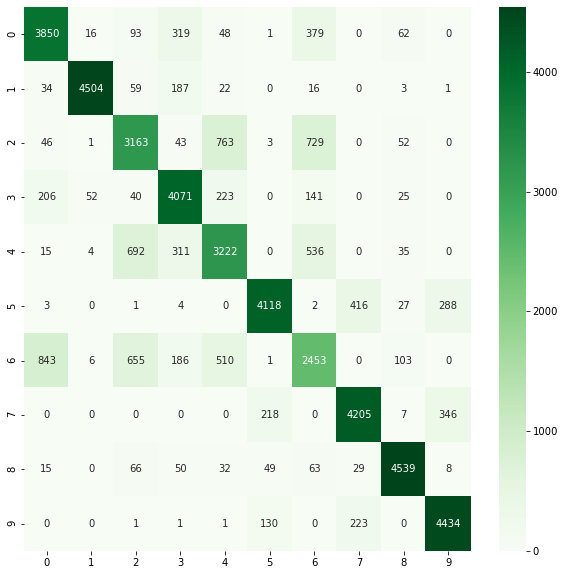

In [50]:
y_pred_knn3_c = cross_val_predict(knn3,  x_train_reduced3, y_train_set, cv=5)
cofussion_knn3=confusion_matrix(y_train_set, y_pred_knn3_c)
confussion_matrix(cofussion_knn3)

In [51]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_knn3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_knn3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_knn3_c,average='weighted'))

precision_score: 0.8025371795203896
recall_score: 0.8033125
f1_score: 0.8023436351005391


In [52]:
XG3=XGBClassifier(n_estimators=400, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.8,
                 use_label_encoder =False,eval_metric = "logloss")
XG3.fit(x_train_recovered3, y_train_set)
y_pred_XG3=XG3.predict(x_test_recovered3)
accuracy_XG3=metrics.accuracy_score(y_test_set, y_pred_XG3)
accuracy_XG3

0.817

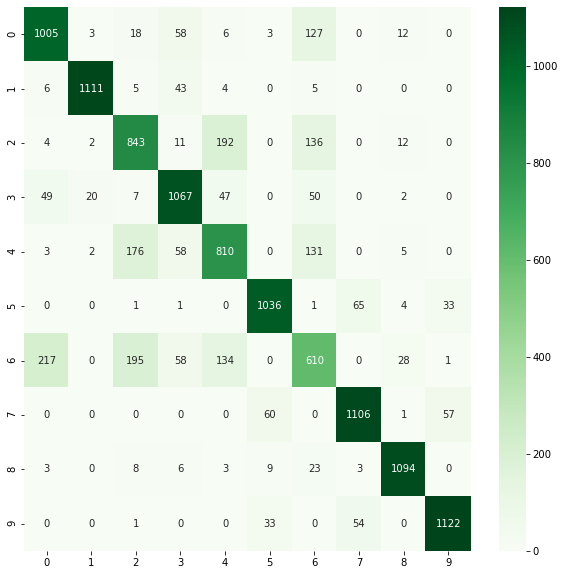

In [53]:
mat_XG3=confusion_matrix(y_test_set, y_pred_XG3)
confussion_matrix(mat_XG3)

In [54]:
print("precision_score_XG3:",precision_score(y_test_set, y_pred_XG3, average='weighted')) 
print("recall_score_XG3:",recall_score(y_test_set, y_pred_XG3,average='weighted'))
print("f1_score_XG3:",f1_score(y_test_set, y_pred_XG3,average='weighted'))

precision_score_XG3: 0.8148762732609454
recall_score_XG3: 0.817
f1_score_XG3: 0.8155331560943708


In [55]:
#cross validation
cv_scores_XG3=cross_val_score(XG3, x_train_reduced3, y_train_set, cv=5, scoring="accuracy")
print(cv_scores_XG3, "mean:", np.mean(cv_scores_XG3))

[0.79625    0.79395833 0.798125   0.79208333 0.79270833] mean: 0.7946250000000001


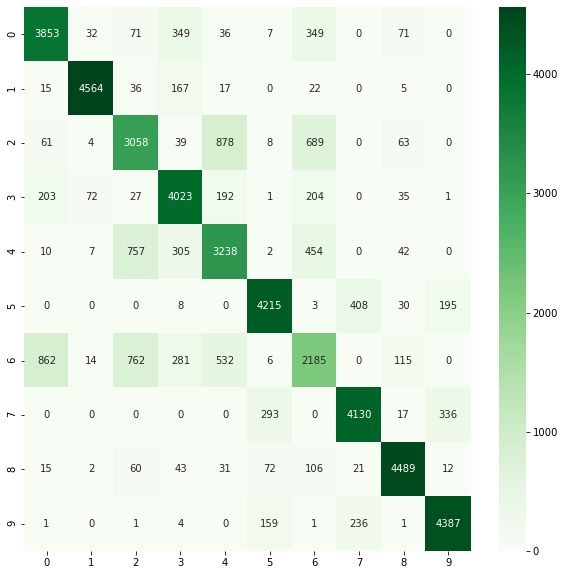

In [56]:
y_pred_xg3_c = cross_val_predict(XG3,  x_train_reduced3, y_train_set, cv=5)
cofussion_xg3=confusion_matrix(y_train_set, y_pred_xg3_c)
confussion_matrix(cofussion_xg3)

In [57]:
# precision call, recalll score, f1 score
print("precision_score:",precision_score(y_train_set, y_pred_xg3_c,average='weighted')) 
print("recall_score:",recall_score(y_train_set, y_pred_xg3_c,average='weighted'))
print("f1_score:",f1_score(y_train_set, y_pred_xg3_c,average='weighted'))

precision_score: 0.7916541405196663
recall_score: 0.794625
f1_score: 0.7925031198374151
